# Exercises 27-11-2023

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from mylib.basics import sturges

## Exercise 9.1
Write a program that generates pseudo-random numbers distributed according to an exponential function and stores them in a list.

In [21]:
def expon_random(tau,N):
    if tau == 0: return np.zeros(N)
    return -tau*np.log(1-np.random.rand(N))

t0 = 5
rand_expon_numbers = expon_random(t0,10)
print(rand_expon_numbers)

[ 5.97174708  4.0075793   5.53969617  1.29808467 13.74837657  2.96732531
  0.46688718 14.28554683 13.0878793  10.45407037]


## Exercise 9.2
Add to the previous program the source code that fills a histogram with the numbers present in the list where they have been transferred, and displays the histogram on the screen.

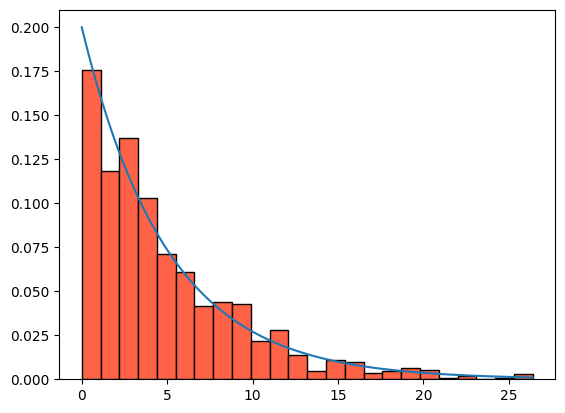

In [39]:
from mylib.radom_numbers import rand_expon as rexp

def display_exp_hist(tau,N):
  rand_expon_numbers = rexp(tau,N)
  X = np.linspace(min(rand_expon_numbers),max(rand_expon_numbers),100)
  plt.hist(rand_expon_numbers, bins=sturges(N), density=True, edgecolor='black', color='tomato')
  plt.plot(X,sc.expon.pdf(X, scale=tau))
  plt.show()

display_exp_hist(5,1000)

## Exercise 9.3
Write a program that plots the exponential probability distribution with a fixed parameter t0.

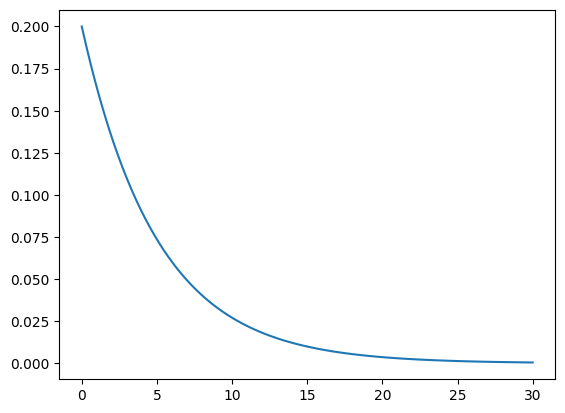

In [40]:
t0 = 5
X = np.linspace(0,t0*6,100)
Y = sc.expon.pdf(X,scale=t0)
plt.plot(X,Y)
plt.show()


## Exercise 9.4
Write a function likelihood that calculates the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1.

How does the result depend on the number of events in the sample?

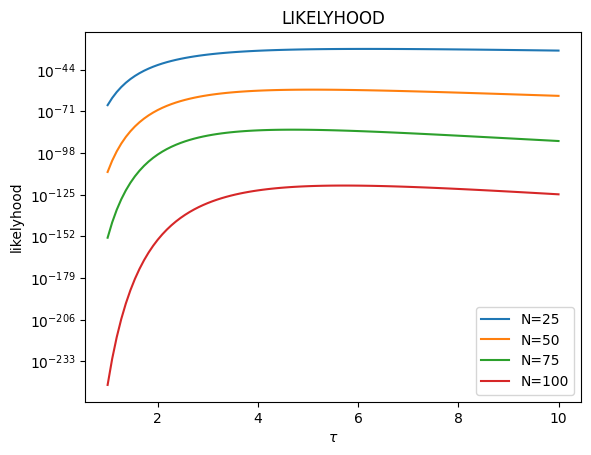

In [91]:
def likelyhood(f,X,tau):
  return np.prod(f(X,tau))

def exponential_pdf(X,tau):
  return sc.expon.pdf(X,scale=tau)

t0s = np.linspace(1,10,100)
real_t0 = 5
for N in [25,50,75,100]:
  lkh = []
  X = rexp(real_t0,N)
  for t0 in t0s:
    lkh.append(likelyhood(exponential_pdf,X,t0))

  plt.plot(t0s,lkh, label=f'N={N}')

plt.yscale('log')
plt.xlabel('$\\tau$')
plt.ylabel('likelyhood')
plt.title('LIKELYHOOD')
plt.legend()

plt.show()

## Execise 9.4.1 _loglikelihood_

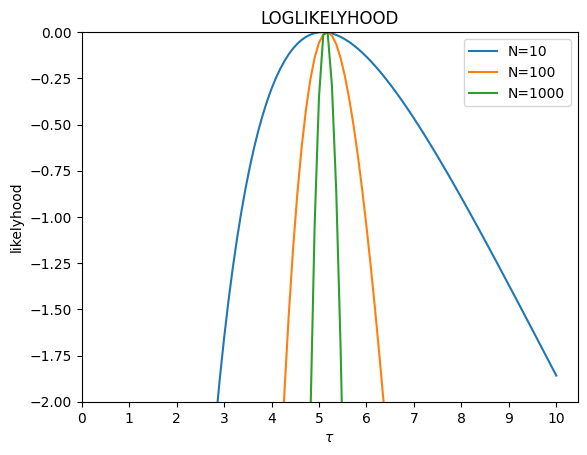

In [101]:
def loglikelyhood(f,X,tau):
  return np.sum(np.log(f(X,tau)))

def exponential_pdf(X,tau):
  return sc.expon.pdf(X,scale=tau)

t0s = np.linspace(1,10,100) # genero dei mu attorno ai quali testare la likelyhood

real_t0 = 5

for N in [10,100,1000]:
  lkh = []
  X = rexp(real_t0,N)
  for t0 in t0s:
    lkh.append(loglikelyhood(exponential_pdf,X,t0))
  lkh = np.array(lkh)
  lkh -= np.max(lkh) # translo tutto sull'asse x = 0
  plt.plot(t0s,lkh, label=f'N={N}')

# plt.yscale('log')
plt.xlabel('$\\tau$')
plt.ylabel('likelyhood')
plt.ylim(-2,0) # sono interessato solo alla regione in cui la loglikelyhood è massima
plt.title('LOGLIKELYHOOD')
plt.xticks(np.arange(0,11))
plt.legend()

plt.show()

## Exercise 9.4

Write a function loglikelihood that calculates the logarithm of the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1. Remember that the logarithm of the likelihood is defined only when the likelihood is strictly positive.



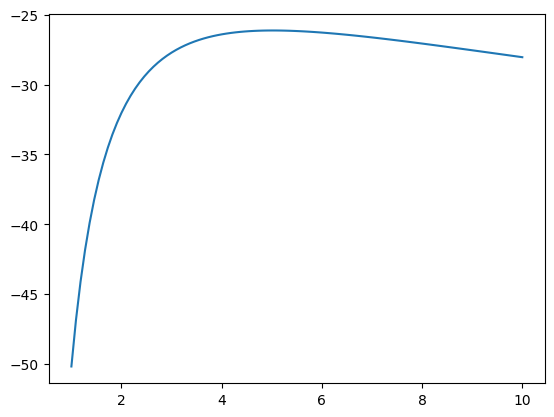

In [126]:
def loglikelyhood(f,X,tau):
  return np.sum(np.log(f(X,tau)))

tau = 5
X = expon_random(tau,10)
R = np.linspace(1,10,100)
L = np.array([loglikelyhood(exponential_pdf,X,t) for t in R])

plt.plot(R,L)
plt.show()

## Exercise 8.6
Study the behavior of the shape of the log-likelihood as a function of the number of events comprising the generated sample.

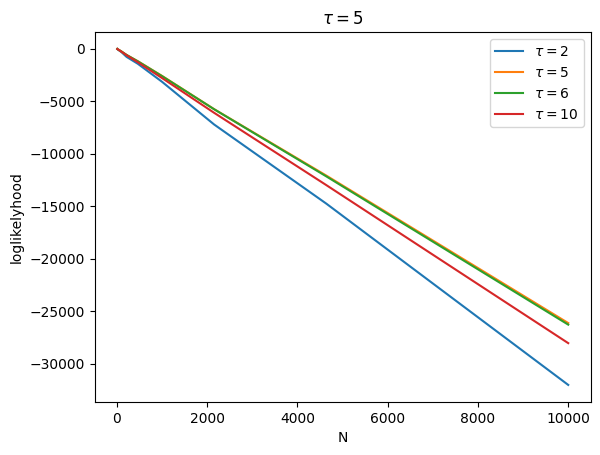

In [123]:
from mylib.radom_numbers import rand_expon
plt.title('$\\tau = 5$')
tau = 5
X = np.logspace(1,4,10, dtype=np.int64)
toys = [rand_expon(tau,i) for i in X]
Y5 = np.array([loglikelyhood(exponential_pdf,i,5) for i in toys])
Y10 = np.array([loglikelyhood(exponential_pdf,i,10) for i in toys])
Y2 = np.array([loglikelyhood(exponential_pdf,i,2) for i in toys])
Y6 = np.array([loglikelyhood(exponential_pdf,i,6) for i in toys])
plt.plot(X,Y2,label='$\\tau = 2$')
plt.plot(X,Y5,label='$\\tau = 5$')
plt.plot(X,Y6,label='$\\tau = 6$')
plt.plot(X,Y10,label='$\\tau = 10$')
plt.ylabel('loglikelyhood')
plt.xlabel('N')
plt.legend()
plt.show()

the maximum loglikelyhood is the one with $\tau$ = 5 as expected 